# Qiskit Demo

## Setup

### Installing Qiskit

In [51]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Importing libraries

In [52]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.tools.visualization import plot_histogram

## Building Circuit

### Circuit initialisation

For the simplest programs with very few qubits, it is useful to represent this process in a diagram known as a circuit diagram.

These have inputs on the left, outputs on the right, and operations represented by arcane symbols in between.

These operations are called gates: [Quantum Logic Gates](https://en.wikipedia.org/wiki/Quantum_logic_gate)

In a circuit, we typically need to do three jobs:

* Encode the input
* Do some actual computation
* Extract an output

In [53]:
# creating quantum circuit
qc = QuantumCircuit(3, 3)

### Step 0: Create the state to be teleported in qubit 0

In [54]:
# qubit 0 is now in state |1> (this is the state that we want to teleport)
qc.x(0)
qc.barrier() # visual aid

### Step 1: Create an entangled Bell pair between qubits 1 and 2

In [55]:
qc.h(1)
qc.cx(1,2)
qc.barrier() # visual aid

### Step 2: Application of a series of operations between the state to teleport and her half of the Bell pair

In [56]:
qc.cx(0,1)
qc.h(0)
qc.barrier() # visual aid

### Step 3: Measures of both qubits 0 and 1

In [57]:
# results stored in classical bits 0 and 1, respectively
qc.measure([0, 1], [0, 1]) 
qc.barrier() # visual aid

### Step 4: States collapse to 0 and 1 of the measured qubits

In [58]:
qc.cx(1, 2)
qc.cz(0, 2)

### Step 5: Measure qubit to find out what state it is in

In [59]:
qc.measure([2], [2])

## Circuit Results

### Circuit Diagram

In [60]:
# drawing the circuit diagram
qc.draw()

┌───┐ ░            ░      ┌───┐ ░ ┌─┐    ░            
q_0: ┤ X ├─░────────────░───■──┤ H ├─░─┤M├────░───────■────
     └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │    
q_1: ──────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─░───■───┼────
           ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │ ┌─┐
q_2: ──────░──────┤ X ├─░────────────░──╫──╫──░─┤ X ├─■─┤M├
           ░      └───┘ ░            ░  ║  ║  ░ └───┘   └╥┘
c: 3/═══════════════════════════════════╩══╩═════════════╩═
                                        0  1             2

### Circuit Simulation

In [61]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=1024).result()

### Simulation Results

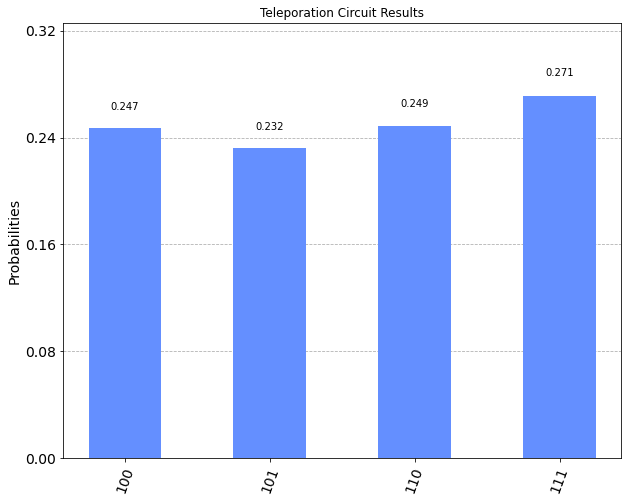

In [73]:
plot_histogram(result.get_counts(qc), title="Teleporation Circuit Results", figsize=(10, 8))